In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, timezone


In [2]:
dataset = pd.read_csv('HomeC-meter1_2015.csv')

In [3]:
dataset.head()

,Date & Time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
0,2015-01-01 00:00:00,1.167223,0.0,1.167223,0.000236,0.229379,0.331326,0.018590,0.067467,0.004420,0.009904,0.000437,0.000060,0.000007,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 00:30:00,1.171444,0.0,1.171444,0.000225,0.228758,0.300048,0.018604,0.108881,0.004456,0.010001,0.000347,0.000087,0.000007,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,1.151474,0.0,1.151474,0.000229,0.229446,0.323099,0.018620,0.005851,0.004449,0.009916,0.000612,0.000031,0.000007,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 01:30:00,1.398982,0.0,1.398982,0.000209,0.277066,0.314399,0.018593,0.005925,0.004457,0.009872,0.000693,0.000004,0.000007,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 02:00:00,1.080775,0.0,1.080775,0.000239,0.228736,0.308560,0.018638,0.062217,0.004478,0.010046,0.000497,0.000032,0.000006,0.0,0.0,0.0,0.0,0.0


In [4]:
dataset.tail()

,Date & Time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
39759,2015-12-31 23:55:00,1.136050,0.003467,1.136050,0.000017,0.021117,0.224267,0.441600,0.126483,0.007083,0.013217,0.000417,0.000100,0.000000,0.031483,0.001050,0.004050,0.001517,0.003467
39760,2015-12-31 23:56:00,0.949633,0.003483,0.949633,0.000033,0.020817,0.063117,0.444967,0.126000,0.006967,0.013117,0.000417,0.000167,0.000017,0.031417,0.001000,0.004050,0.001550,0.003483
39761,2015-12-31 23:57:00,0.944700,0.003467,0.944700,0.000017,0.020783,0.062550,0.445350,0.125467,0.006950,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004050,0.001633,0.003467
39762,2015-12-31 23:58:00,0.945417,0.003483,0.945417,0.000017,0.020783,0.061850,0.450667,0.125050,0.007033,0.013100,0.000417,0.000150,0.000000,0.031467,0.001000,0.004033,0.001583,0.003483
39763,2015-12-31 23:59:00,0.936550,0.003467,0.936550,0.000000,0.020717,0.062800,0.442717,0.124633,0.006950,0.013117,0.000433,0.000133,0.000000,0.031533,0.001000,0.004050,0.001633,0.003467


In [5]:
dataset.columns

Index(['Date & Time', 'use [kW]', 'gen [kW]', 'House overall [kW]',
       'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]',
       'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]',
       'Garage door [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]',
       'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]', 'Microwave [kW]',
       'Living room [kW]', 'Solar [kW]'],
      dtype='object')

In [6]:
dataset.columns = [col.replace(' [kW]', '') for col in dataset.columns]
dataset.columns

Index(['Date & Time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar'],
      dtype='object')

In [7]:
dataset.describe()

,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar
count,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000
mean,0.893137,0.045883,0.893137,0.038868,0.118660,0.154126,0.082780,0.056743,0.025174,0.013910,0.001548,0.009786,0.000008,0.075229,0.015604,0.011691,0.039420,0.045883
std,0.737002,0.099776,0.737002,0.199305,0.170315,0.180630,0.096339,0.065954,0.042349,0.009516,0.019522,0.075930,0.000009,0.236358,0.117577,0.094075,0.095368,0.099776
min,0.000133,0.000000,0.000133,0.000000,0.000067,0.000217,0.000133,0.000017,0.000000,0.000033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.431470,0.003000,0.431470,0.000006,0.020250,0.063540,0.040210,0.005117,0.004484,0.012570,0.000500,0.000029,0.000000,0.029583,0.000997,0.004000,0.001454,0.003000
50%,0.708066,0.003367,0.708066,0.000030,0.020700,0.065864,0.042333,0.017279,0.007333,0.012900,0.000667,0.000067,0.000004,0.031500,0.001000,0.004003,0.001567,0.003367
75%,1.132841,0.019825,1.132841,0.000217,0.153071,0.126712,0.080521,0.119886,0.008267,0.013083,0.000733,0.000217,0.000017,0.038300,0.001017,0.004167,0.001667,0.019825
max,9.890377,1.043312,9.890377,1.370083,1.843700,0.769954,0.870517,0.631167,1.226867,0.275139,0.878183,1.607650,0.000067,6.279317,1.615567,1.873533,0.372333,1.043312


In [8]:
dataset.shape

(39764, 19)

In [9]:
#Checking null values
dataset.isnull().sum()

Date & Time      0
use              0
gen              0
House overall    0
Dishwasher       0
Furnace 1        0
Furnace 2        0
Home office      0
Fridge           0
Wine cellar      0
Garage door      0
Kitchen 12       0
Kitchen 14       0
Kitchen 38       0
Barn             0
Well             0
Microwave        0
Living room      0
Solar            0
dtype: int64

In [10]:
dataset.isna().sum()

Date & Time      0
use              0
gen              0
House overall    0
Dishwasher       0
Furnace 1        0
Furnace 2        0
Home office      0
Fridge           0
Wine cellar      0
Garage door      0
Kitchen 12       0
Kitchen 14       0
Kitchen 38       0
Barn             0
Well             0
Microwave        0
Living room      0
Solar            0
dtype: int64

In [11]:
# Check if there are entries with null values
display(dataset.info())
dataset[dataset.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39764 entries, 0 to 39763
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date & Time    39764 non-null  object 
 1   use            39764 non-null  float64
 2   gen            39764 non-null  float64
 3   House overall  39764 non-null  float64
 4   Dishwasher     39764 non-null  float64
 5   Furnace 1      39764 non-null  float64
 6   Furnace 2      39764 non-null  float64
 7   Home office    39764 non-null  float64
 8   Fridge         39764 non-null  float64
 9   Wine cellar    39764 non-null  float64
 10  Garage door    39764 non-null  float64
 11  Kitchen 12     39764 non-null  float64
 12  Kitchen 14     39764 non-null  float64
 13  Kitchen 38     39764 non-null  float64
 14  Barn           39764 non-null  float64
 15  Well           39764 non-null  float64
 16  Microwave      39764 non-null  float64
 17  Living room    39764 non-null  float64
 18  Solar 

None

,Date & Time,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar


In [12]:
dataset['Date & Time'].head()

0    2015-01-01 00:00:00
1    2015-01-01 00:30:00
2    2015-01-01 01:00:00
3    2015-01-01 01:30:00
4    2015-01-01 02:00:00
Name: Date & Time, dtype: object

In [13]:
dataset.shape

(39764, 19)

<AxesSubplot:>

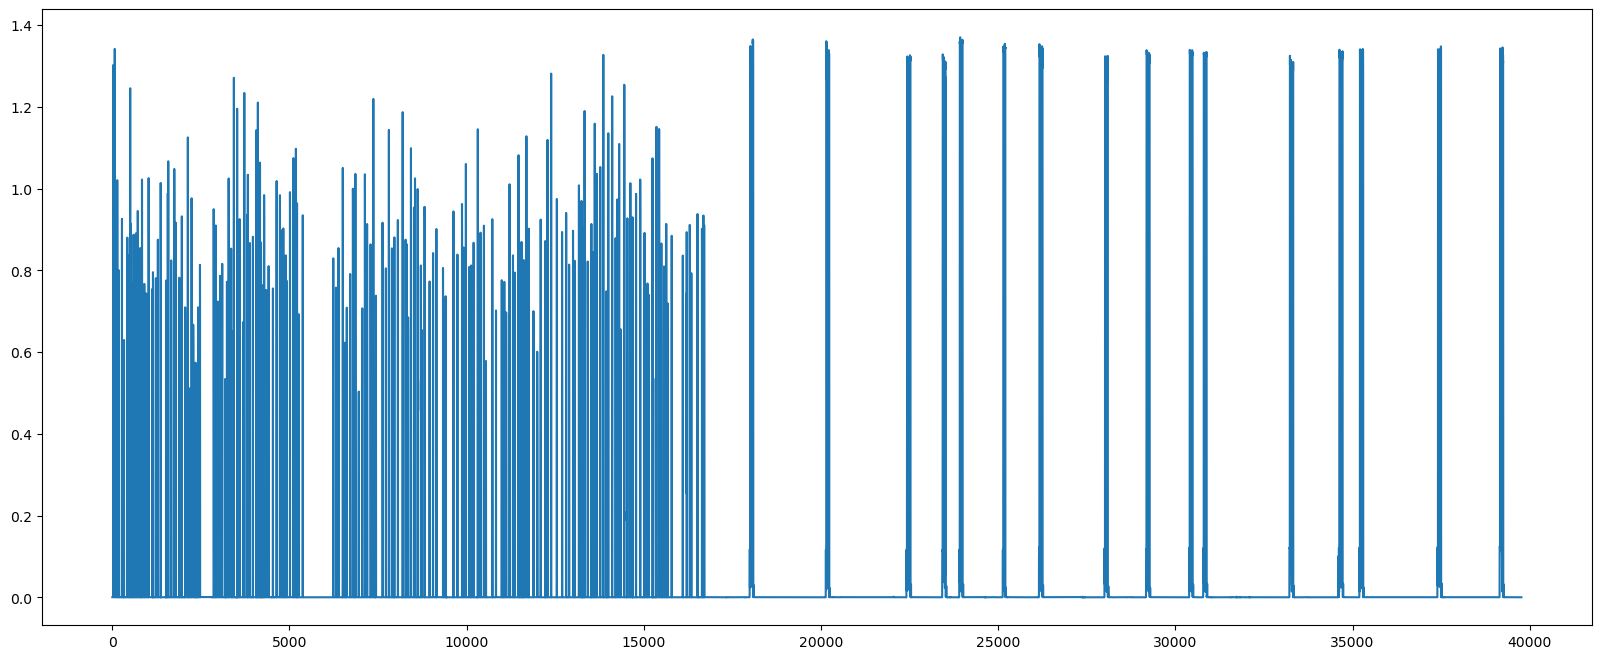

In [14]:
dataset['Dishwasher'].plot(figsize=(20,8))

In [15]:
dataset['sum_Furnace'] = dataset[['Furnace 1','Furnace 2']].sum(axis=1)
dataset['sum_Kitchen'] = dataset[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

In [16]:
dataset = dataset.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
dataset = dataset.drop(['Furnace 1','Furnace 2'], axis=1)
dataset.columns

Index(['Date & Time', 'use', 'gen', 'House overall', 'Dishwasher',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well',
       'Microwave', 'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'],
      dtype='object')

In [17]:
dataset.shape

(39764, 16)

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,5)

In [19]:
# Convert the 'Datetime' column to a datetime object and set it as the index
dataset['Date & Time'] = pd.to_datetime(dataset['Date & Time'])
dataset.set_index(['Date & Time'], inplace=True)


KeyError: 'Use'

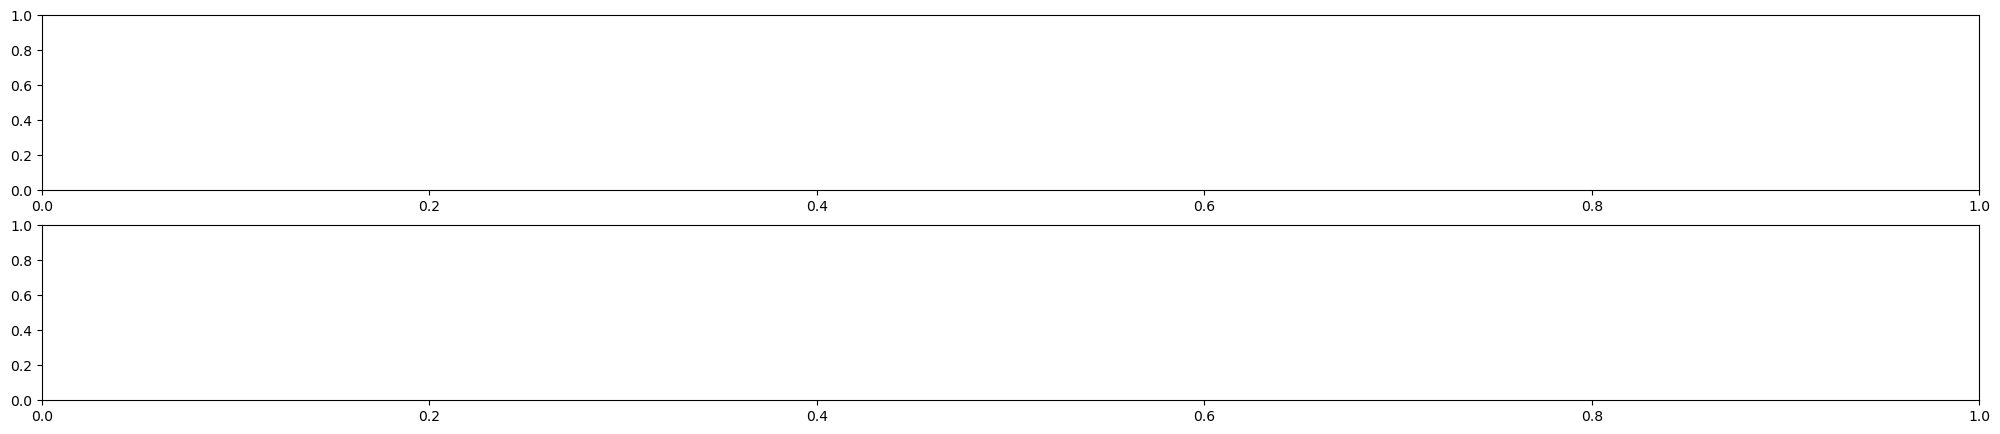

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1)
dataset['Use'].resample('D').mean().plot(ax=axes[0])
dataset['Gen'].resample('D').mean().plot(ax=axes[1])

In [21]:
dataset['Barn'].value_counts()

0.000000    3724
0.031283     178
0.031317     177
0.031017     169
0.031050     168
            ... 
0.031584       1
0.031934       1
0.032023       1
0.031804       1
0.155067       1
Name: Barn, Length: 15404, dtype: int64

<AxesSubplot:xlabel='Date & Time'>

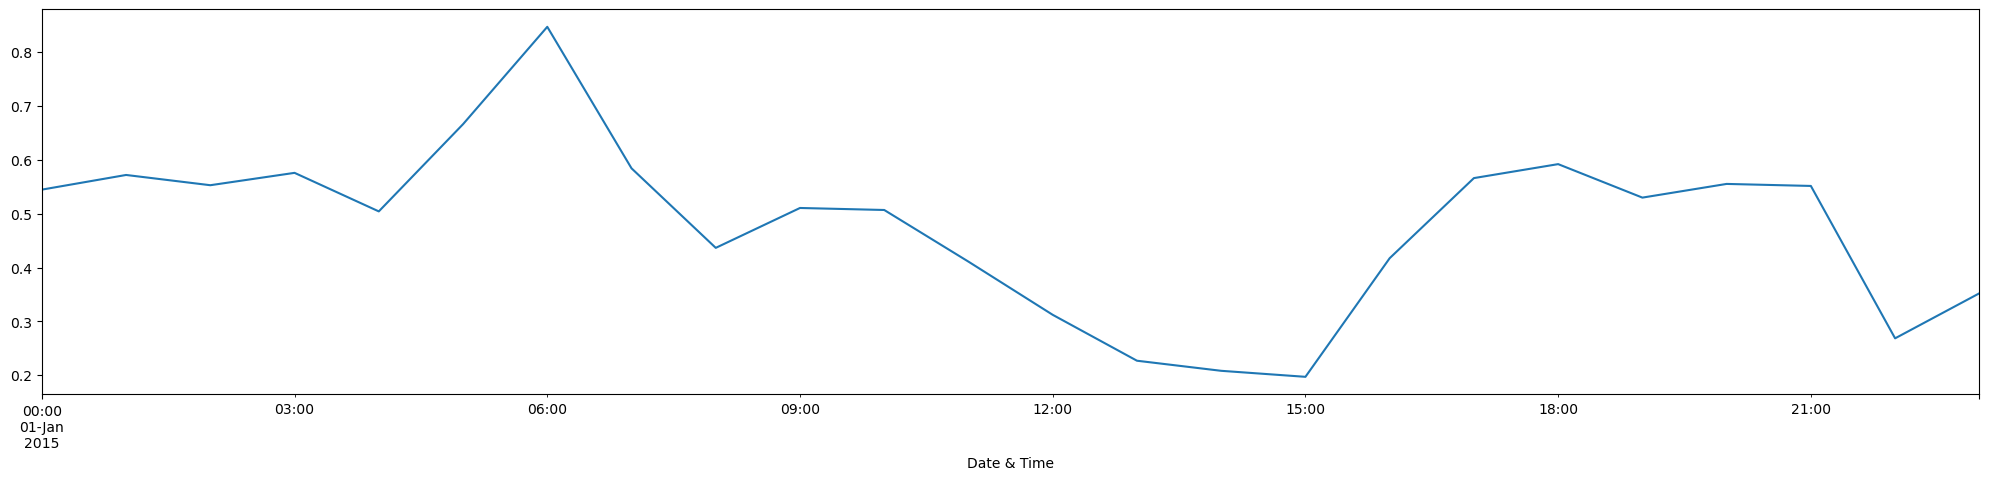

In [22]:
dataset['sum_Furnace'].resample("h").mean().iloc[:24].plot()

In [23]:
# import pmdarima as pm
# from pmdarima.arima import auto_arima

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, adfuller, grangercausalitytests
import statsmodels.tsa.vector_ar.vecm as vecm
from statsmodels.tsa.api import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.decomposition import PCA


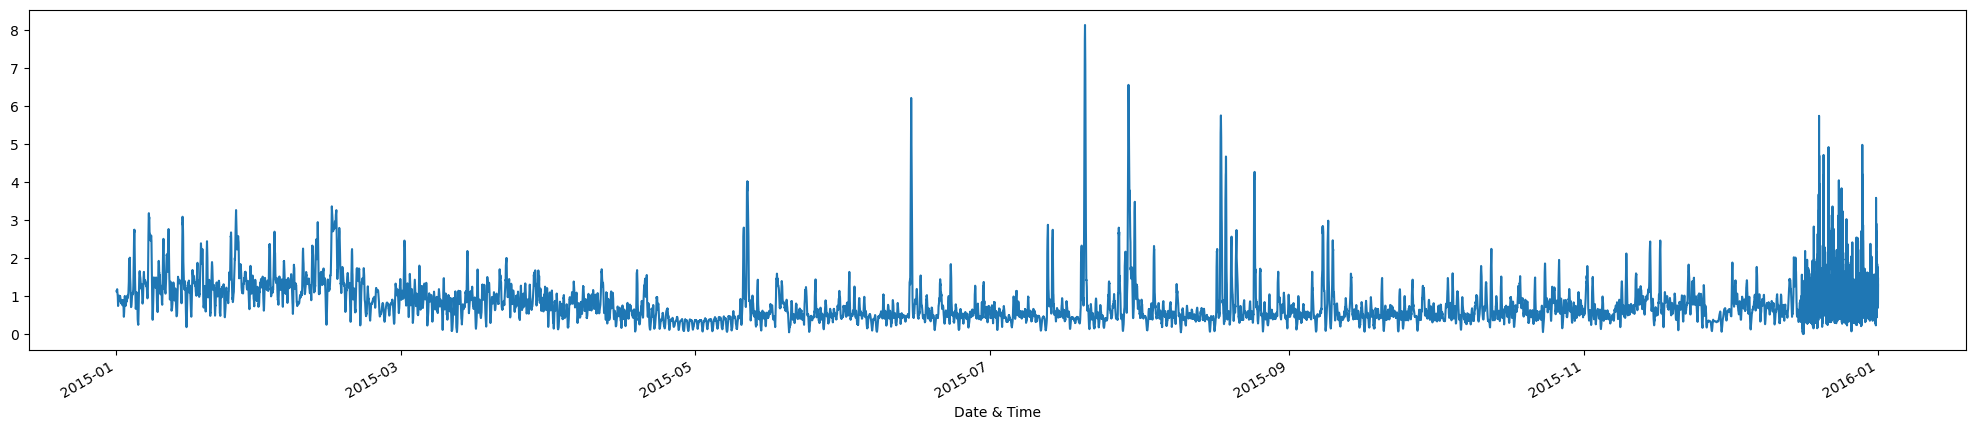

In [24]:
# Simple Moving Average
dataset['use'] = dataset['use'].rolling(10).mean().plot()

C:\Users\apoor\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


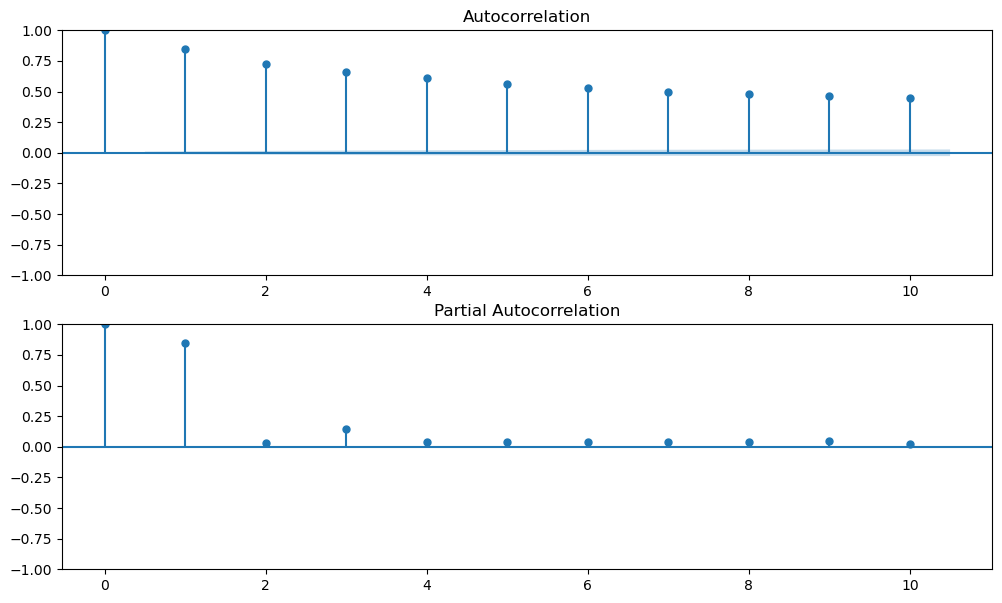

In [25]:
# show plots in the notebook
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf( dataset['House overall'].values.squeeze(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataset['House overall'], lags=10, ax=ax2)

(None, None)

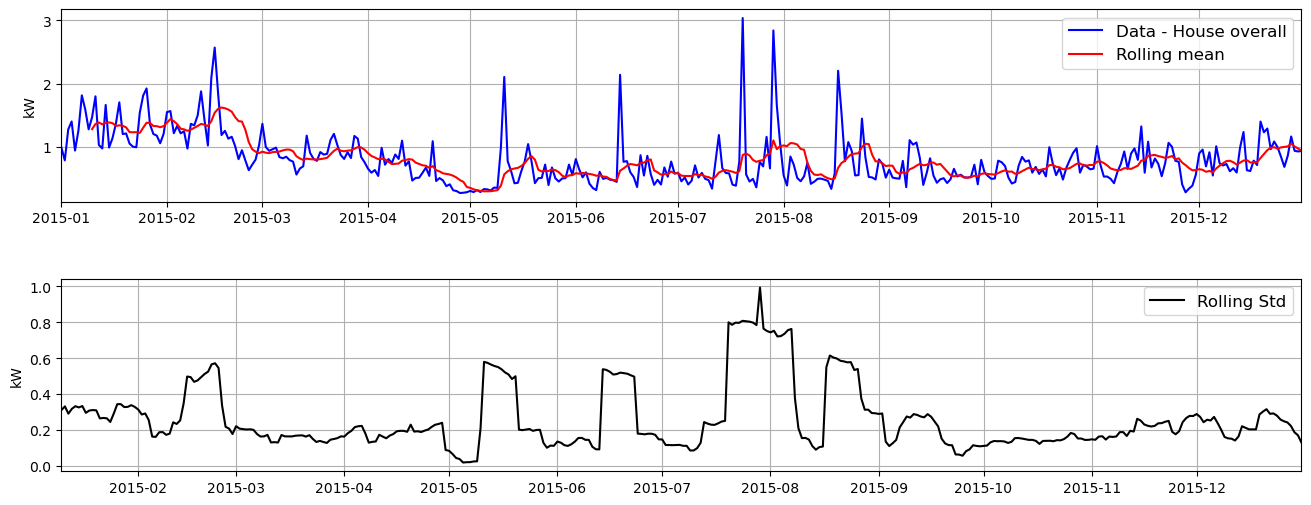

In [26]:
data_daily = dataset ['House overall'].resample('d').mean()
rollingMEAN = data_daily.rolling(window=10).mean()
rollingSTD = data_daily.rolling(window=10).std()
#Plot
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,6))
plt.subplots_adjust(hspace=0.4)
ax1.plot(data_daily, c='blue',label='Data - House overall')
ax1.plot(rollingMEAN, c='red', label='Rolling mean')
ax2.plot(rollingSTD, c='black',label = 'Rolling Std')

ax1.legend(fontsize=12), ax2.legend(fontsize=12)
ax1.set_ylabel('kW'), ax2.set_ylabel('kW')
ax1.margins(x=0), ax2.margins(x=0)
ax1.grid(), ax2.grid()

In [27]:
from statsmodels.tsa.stattools import adfuller

resultDFtest = adfuller(data_daily, autolag='AIC')
Out = pd.Series(resultDFtest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key1, value1 in resultDFtest[4].items():
    Out['Critical Value (%s)'%key1] = value1
    
print('DICK-FULLER RESULTS: \n\n{}'.format(Out))
 

DICK-FULLER RESULTS: 

Test Statistic                  -3.217464
p-value                          0.018996
#Lags Used                       8.000000
Number of Observations Used    356.000000
Critical Value (1%)             -3.448853
Critical Value (5%)             -2.869693
Critical Value (10%)            -2.571114
dtype: float64


In [28]:
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]
print('Number of points in series:', len(data_daily))
print('Number of points in train:', len(train))
print('Number of points in test:', len(test))

Number of points in series: 365
Number of points in train: 255
Number of points in test: 110


In [29]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(0,1,0))
#model = sm.tsa.statespace.SARIMAX(train, order=(0,1,0), seasonal_order=(5,0,1,12))
model_fit = model.fit()
print('Akaike information criterion: ', model_fit.aic)

Akaike information criterion:  292.8637742344887


                               SARIMAX Results                                
Dep. Variable:          House overall   No. Observations:                  255
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -145.432
Date:                Fri, 03 Mar 2023   AIC                            292.864
Time:                        15:52:06   BIC                            296.401
Sample:                    01-01-2015   HQIC                           294.287
                         - 09-12-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1840      0.006     28.494      0.000       0.171       0.197
Ljung-Box (L1) (Q):                  24.40   Jarque-Bera (JB):              1247.37
Prob(Q):                              0.00   Pr

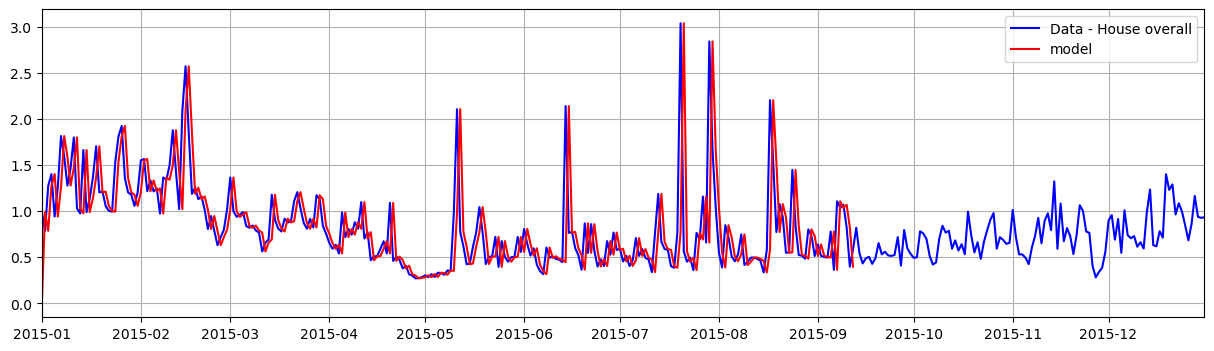

In [30]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);
print(model_fit.summary())

MSE: 0.069
RMSE: 0.263
MAE: 0.198
MAPE: 0.251
MASE: 0.787
R^2 score: -0.379


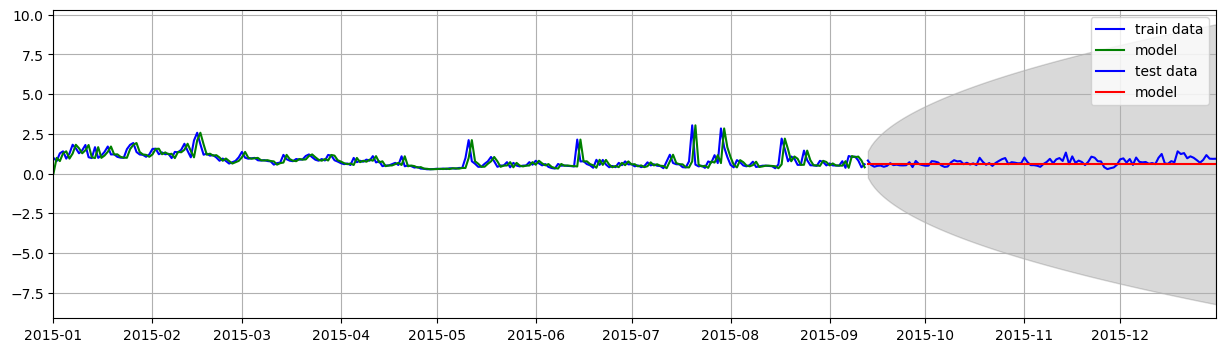

In [31]:
from sklearn.metrics import mean_absolute_error,r2_score

new_fit = model_fit.append(data_daily[size:size+1], refit=False)
forecast = model_fit.forecast(len(test))
confidence = model_fit.get_forecast(len(test)).conf_int(0.05)
#forecast = model_fit.predict(246, 351)
plt.figure(figsize=(15,4))
plt.plot(train, c='blue',label='train data')
plt.plot(model_fit.predict(dynamic=False), c='green', label='model')
plt.plot(test, c='blue',label='test data')
plt.plot(forecast, c='red', label='model')
plt.fill_between(confidence.index,confidence['lower House overall'],
                 confidence['upper House overall'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0);
# calcolo errore
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE = mean_absolute_error(test, forecast)
MAPE = np.mean(np.abs(forecast - test)/np.abs(test))
MASE = np.mean(np.abs(test - forecast))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))


In [32]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,1,0))
#model = sm.tsa.statespace.SARIMAX(train, order=(1,1,0), seasonal_order=(5,0,1,12))
model_fit = model.fit()
print('Akaike information criterion: ', model_fit.aic)

Akaike information criterion:  269.5853813328835


                               SARIMAX Results                                
Dep. Variable:          House overall   No. Observations:                  255
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -132.793
Date:                Fri, 03 Mar 2023   AIC                            269.585
Time:                        15:52:07   BIC                            276.660
Sample:                    01-01-2015   HQIC                           272.431
                         - 09-12-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3074      0.029    -10.621      0.000      -0.364      -0.251
sigma2         0.1665      0.006     26.801      0.000       0.154       0.179
Ljung-Box (L1) (Q):                   1.65   Jarque-

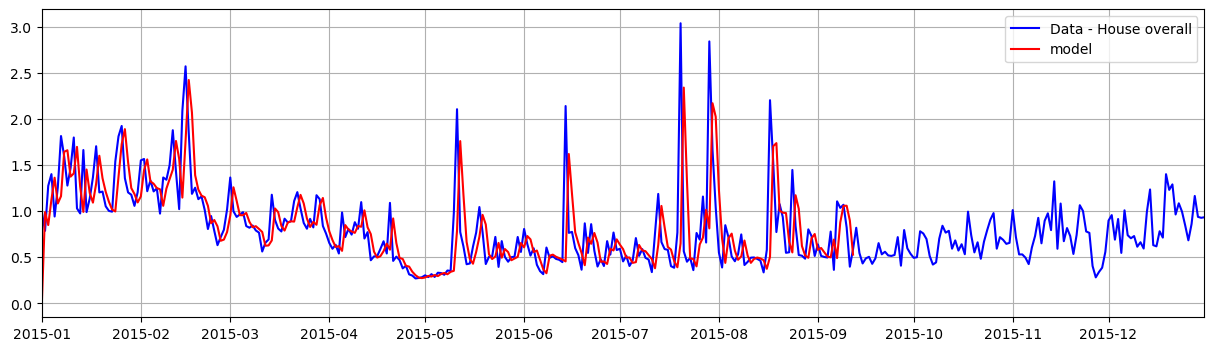

In [33]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);
print(model_fit.summary())

MSE: 0.084
RMSE: 0.289
MAE: 0.217
MAPE: 0.265
MASE: 0.864
R^2 score: -0.662


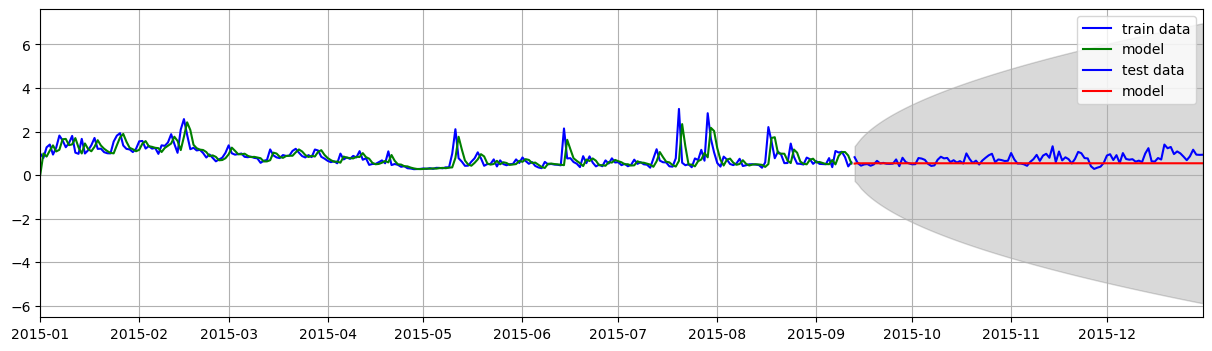

In [34]:
from sklearn.metrics import mean_absolute_error,r2_score

new_fit = model_fit.append(data_daily[size:size+1], refit=False)
forecast = model_fit.forecast(len(test))
confidence = model_fit.get_forecast(len(test)).conf_int(0.05)
#forecast = model_fit.predict(246, 351)
plt.figure(figsize=(15,4))
plt.plot(train, c='blue',label='train data')
plt.plot(model_fit.predict(dynamic=False), c='green', label='model')
plt.plot(test, c='blue',label='test data')
plt.plot(forecast, c='red', label='model')
plt.fill_between(confidence.index,confidence['lower House overall'],
                 confidence['upper House overall'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0);
# calcolo errore
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE = mean_absolute_error(test, forecast)
MAPE = np.mean(np.abs(forecast - test)/np.abs(test))
MASE = np.mean(np.abs(test - forecast))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))


In [35]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,1,1))
#model = sm.tsa.statespace.SARIMAX(train, order=(1,1,1), seasonal_order=(5,0,1,12))
model_fit = model.fit()
print('Akaike information criterion: ', model_fit.aic)

Akaike information criterion:  211.26176887978698


                               SARIMAX Results                                
Dep. Variable:          House overall   No. Observations:                  255
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -102.631
Date:                Fri, 03 Mar 2023   AIC                            211.262
Time:                        15:52:07   BIC                            221.874
Sample:                    01-01-2015   HQIC                           215.531
                         - 09-12-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3285      0.049      6.740      0.000       0.233       0.424
ma.L1         -0.9305      0.030    -30.605      0.000      -0.990      -0.871
sigma2         0.1306      0.004     32.042      0.0

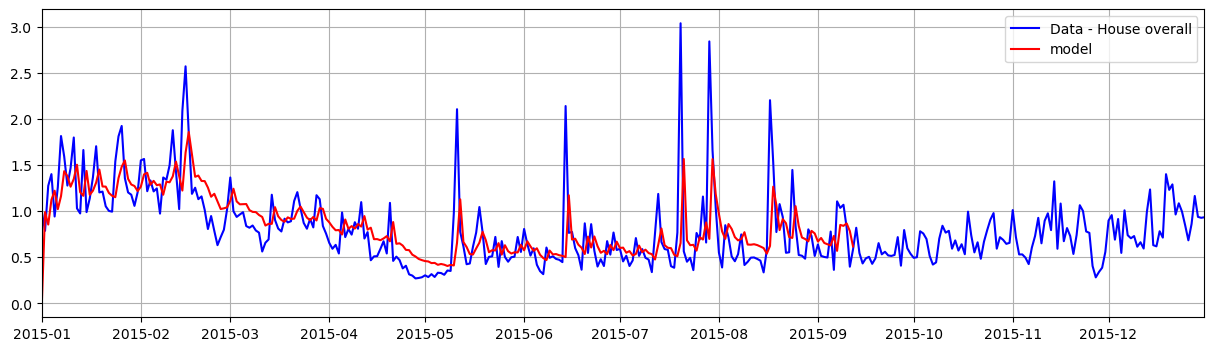

In [36]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);
print(model_fit.summary())

MSE: 0.050
RMSE: 0.224
MAE: 0.177
MAPE: 0.270
MASE: 0.705
R^2 score: -0.001


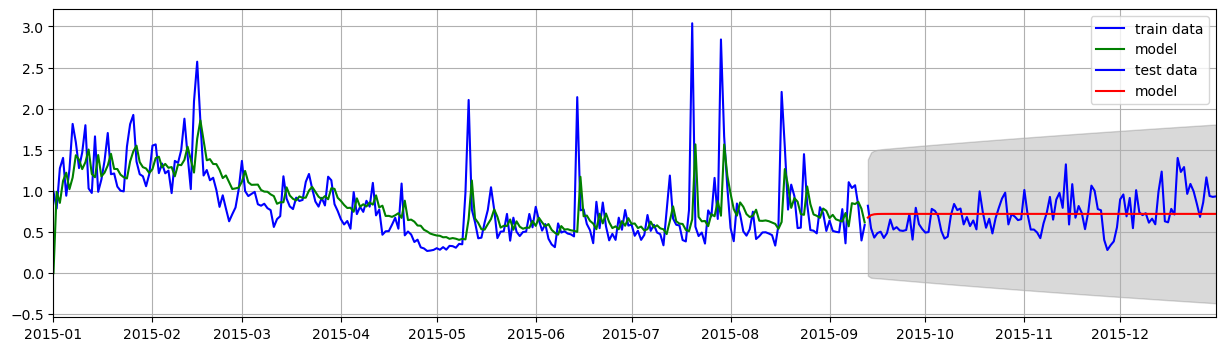

In [37]:
from sklearn.metrics import mean_absolute_error,r2_score

new_fit = model_fit.append(data_daily[size:size+1], refit=False)
forecast = model_fit.forecast(len(test))
confidence = model_fit.get_forecast(len(test)).conf_int(0.05)
#forecast = model_fit.predict(246, 351)
plt.figure(figsize=(15,4))
plt.plot(train, c='blue',label='train data')
plt.plot(model_fit.predict(dynamic=False), c='green', label='model')
plt.plot(test, c='blue',label='test data')
plt.plot(forecast, c='red', label='model')
plt.fill_between(confidence.index,confidence['lower House overall'],
                 confidence['upper House overall'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0);
# calcolo errore
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE = mean_absolute_error(test, forecast)
MAPE = np.mean(np.abs(forecast - test)/np.abs(test))
MASE = np.mean(np.abs(test - forecast))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))


In [38]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(2,1,1))
#model = sm.tsa.statespace.SARIMAX(train, order=(2,1,1), seasonal_order=(5,0,1,12))
model_fit = model.fit()
print('Akaike information criterion: ', model_fit.aic)

Akaike information criterion:  212.79740513008107


                               SARIMAX Results                                
Dep. Variable:          House overall   No. Observations:                  255
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -102.399
Date:                Fri, 03 Mar 2023   AIC                            212.797
Time:                        15:52:08   BIC                            226.947
Sample:                    01-01-2015   HQIC                           218.490
                         - 09-12-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3355      0.050      6.670      0.000       0.237       0.434
ar.L2         -0.0454      0.087     -0.520      0.603      -0.217       0.126
ma.L1         -0.9246      0.038    -24.337      0.0

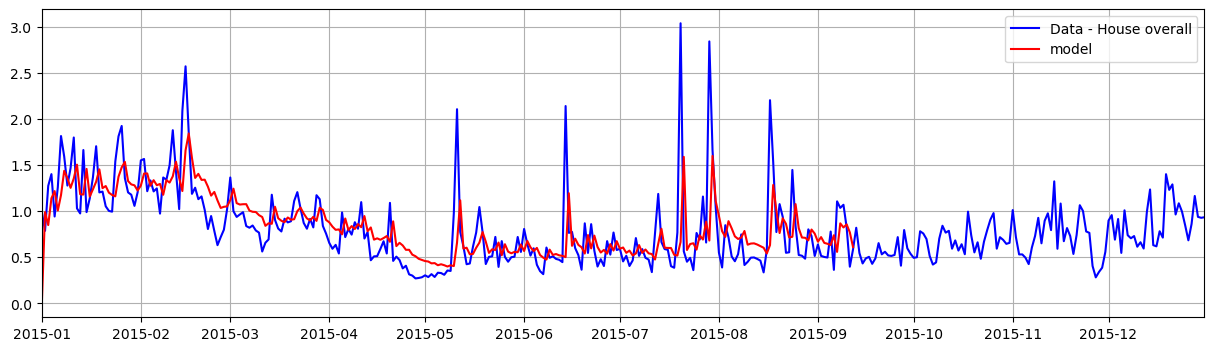

In [39]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);
print(model_fit.summary())

MSE: 0.050
RMSE: 0.224
MAE: 0.177
MAPE: 0.270
MASE: 0.706
R^2 score: -0.001


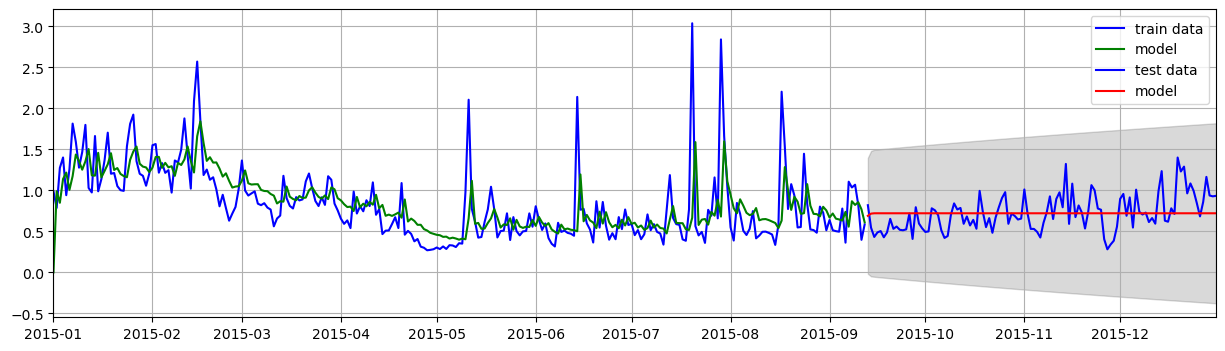

In [40]:
from sklearn.metrics import mean_absolute_error,r2_score

new_fit = model_fit.append(data_daily[size:size+1], refit=False)
forecast = model_fit.forecast(len(test))
confidence = model_fit.get_forecast(len(test)).conf_int(0.05)
#forecast = model_fit.predict(246, 351)
plt.figure(figsize=(15,4))
plt.plot(train, c='blue',label='train data')
plt.plot(model_fit.predict(dynamic=False), c='green', label='model')
plt.plot(test, c='blue',label='test data')
plt.plot(forecast, c='red', label='model')
plt.fill_between(confidence.index,confidence['lower House overall'],
                 confidence['upper House overall'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0);
# calcolo errore
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE = mean_absolute_error(test, forecast)
MAPE = np.mean(np.abs(forecast - test)/np.abs(test))
MASE = np.mean(np.abs(test - forecast))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))


In [41]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(2,1,3))
#model = sm.tsa.statespace.SARIMAX(train, order=(2,1,1), seasonal_order=(5,0,1,12))
model_fit = model.fit()
print('Akaike information criterion: ', model_fit.aic)

Akaike information criterion:  216.21612676674727


                               SARIMAX Results                                
Dep. Variable:          House overall   No. Observations:                  255
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -102.108
Date:                Fri, 03 Mar 2023   AIC                            216.216
Time:                        15:52:09   BIC                            237.440
Sample:                    01-01-2015   HQIC                           224.754
                         - 09-12-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6251      0.599     -1.043      0.297      -1.799       0.549
ar.L2          0.2278      0.286      0.796      0.426      -0.333       0.789
ma.L1          0.0382      0.601      0.063      0.9

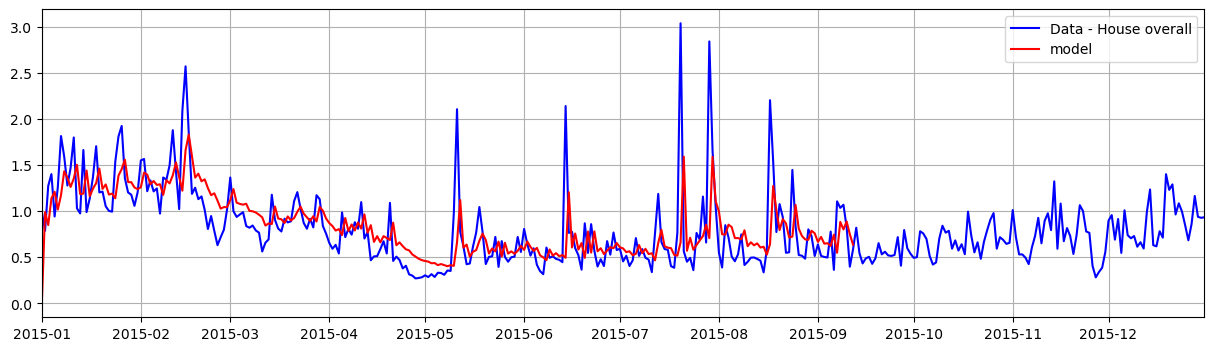

In [42]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);
print(model_fit.summary())

MSE: 0.050
RMSE: 0.224
MAE: 0.177
MAPE: 0.270
MASE: 0.706
R^2 score: -0.001


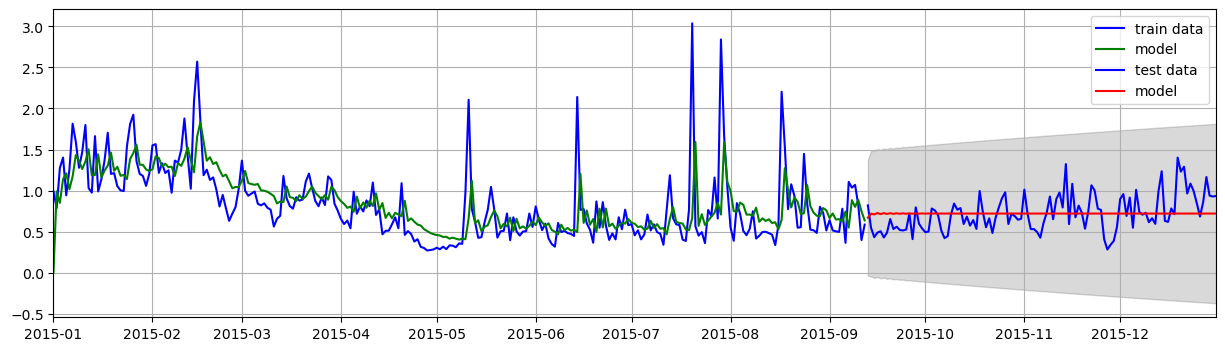

In [43]:
from sklearn.metrics import mean_absolute_error,r2_score

new_fit = model_fit.append(data_daily[size:size+1], refit=False)
forecast = model_fit.forecast(len(test))
confidence = model_fit.get_forecast(len(test)).conf_int(0.05)
#forecast = model_fit.predict(246, 351)
plt.figure(figsize=(15,4))
plt.plot(train, c='blue',label='train data')
plt.plot(model_fit.predict(dynamic=False), c='green', label='model')
plt.plot(test, c='blue',label='test data')
plt.plot(forecast, c='red', label='model')
plt.fill_between(confidence.index,confidence['lower House overall'],
                 confidence['upper House overall'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0);
# calcolo errore
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE = mean_absolute_error(test, forecast)
MAPE = np.mean(np.abs(forecast - test)/np.abs(test))
MASE = np.mean(np.abs(test - forecast))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))


<Figure size 2500x500 with 0 Axes>

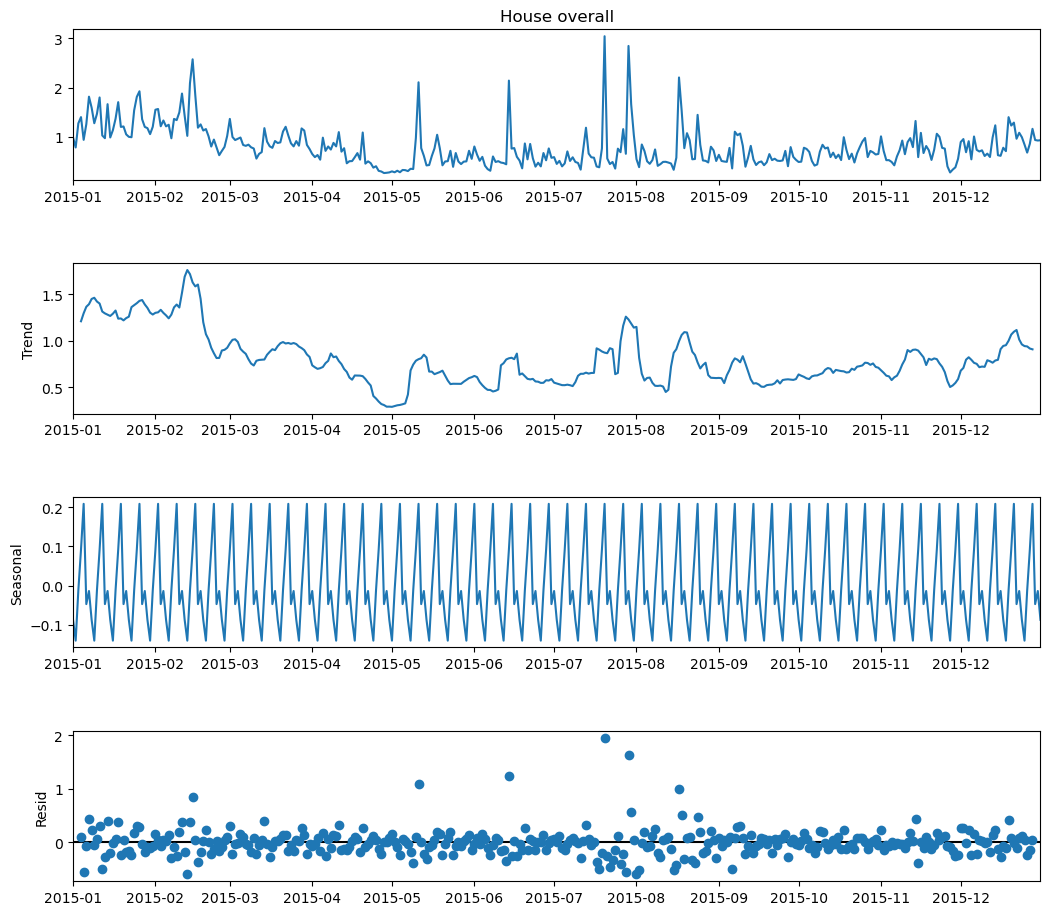

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_daily, model='additive')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 10)

In [45]:
from pmdarima.arima import auto_arima, ADFTest
ADFTest(alpha=0.05).should_diff(data_daily)


(0.020057874560880467, False)

In [46]:
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]

arima_model = auto_arima(train, start_p=0, d=0, start_q=0, max_p=5, max_d=5, max_q=5,
                        start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,  m=12, #if m=1 seasonal is set to False
                        seasonal=True, error_action='warn', trace=True, suppress_warnings=True,
                        stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=416.057, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=322.101, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=414.748, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=377.584, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=264.663, Time=0.53 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=263.003, Time=0.96 sec
 ARIMA(1,0,0)(4,1,0)[12] intercept   : AIC=260.925, Time=1.58 sec
 ARIMA(1,0,0)(5,1,0)[12] intercept   : AIC=262.768, Time=3.32 sec
 ARIMA(1,0,0)(4,1,1)[12] intercept   : AIC=inf, Time=5.70 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=3.18 sec
 ARIMA(1,0,0)(5,1,1)[12] intercept   : AIC=inf, Time=9.25 sec
 ARIMA(0,0,0)(4,1,0)[12] intercept   : AIC=305.752, Time=1.52 sec
 ARIMA(2,0,0)(4,1,0)[12] intercept   : AIC=262.871, Time=2.47 sec
 ARIMA(1,0,1)(4,1,0)[12] intercept   : AIC=262.83

In [47]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  255
Model:             SARIMAX(2, 0, 1)x(4, 1, [], 12)   Log Likelihood                -120.364
Date:                             Fri, 03 Mar 2023   AIC                            256.728
Time:                                     15:58:11   BIC                            284.673
Sample:                                 01-01-2015   HQIC                           267.984
                                      - 09-12-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3129      0.091     14.445      0.000       1.135       1.491
ar.L2         -0.3247      0.078     -4.150      0.000      -0.478      -0.171
ma.L1         -0.9332      0.057    -16.323      0.000      -1.045      -0.821
ar.S.L12      -0.8472      0.073    -11.640      0.000      -0.990      -0.705
ar.S.L24      -0.7642      0.115     -6.654      0.000      -0.989      -0.539
ar.S.L36      -0.3559      0.119     -2.988      0.003      -0.589      -0.122
ar.S.L48      -0.2220      0.116     -1.922      0.055      -0.448       0.004
sigma2         0.1493      0.007     22.012      0.000       0.136       0.163
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               921.44
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               2.49   Skew:                             2.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Actual values:  [0.819 0.545 0.432 0.487 0.504 0.428 0.487 0.653 0.531 0.559]
Predictions:    [0.77  0.538 0.772 0.629 0.749 1.067 0.575 0.548 0.642 1.237]
RMSE: 0.284
MAE: 0.225
MAPE: 0.344


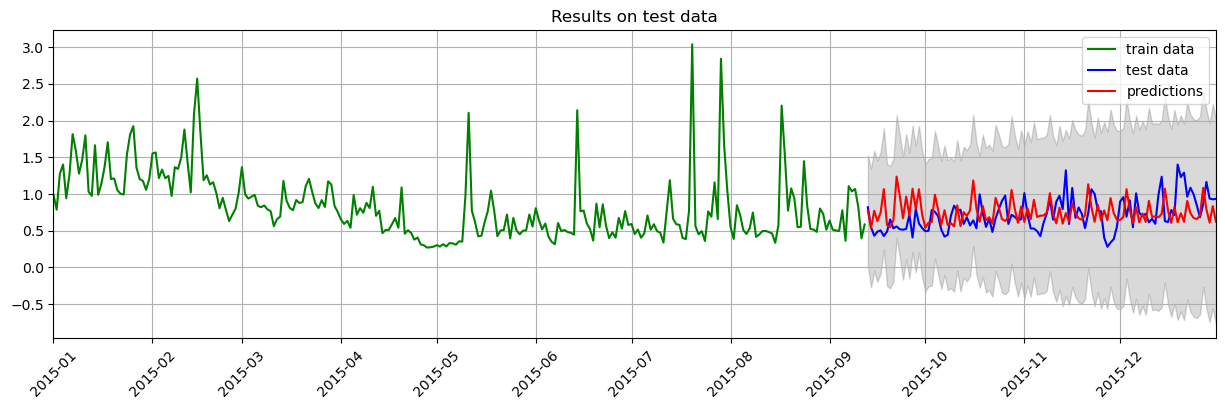

In [48]:
y_forec, conf_int  = arima_model.predict(len(test),return_conf_int=True,alpha=0.05)
pred = pd.Series(y_forec, index=test.index)
pred.columns = ['predicted']
confidence = pd.DataFrame(conf_int, columns=['lower', 'upper'])

plt.figure(figsize=(15,4))
plt.plot(train, c='green', label='train data')
plt.plot(test, c='blue', label='test data')
plt.plot(pred, c='red', label='predictions')
plt.legend()
plt.grid(), plt.margins(x=0)
plt.title('Results on test data'), plt.xticks(rotation=45)
plt.fill_between(test.index, confidence['lower'],
                 confidence['upper'], color='k', alpha=.15)


from sklearn.metrics import r2_score
print('Actual values: ', np.around(test[:10].tolist(),3))
print('Predictions:   ', np.around(pred[:10].tolist(),3))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, pred)))
MAE = mean_absolute_error(test, pred)
MAPE = np.mean(np.abs(pred - test)/np.abs(test))
MASE = np.mean(np.abs(test - pred ))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)

In [ ]:
# Generate synthetic data
n_households = 10
synthetic_data = pd.DataFrame()
for i in range(n_households):
    forecast = arima_model.predict(n_periods=24)
    synthetic_data['House overall_'+str(i)] = forecast

synthetic_data.columns = ['House overall_'+str(i) for i in range(n_households)]
synthetic_data.index = pd.date_range(start=test.index.min(), periods=len(synthetic_data), freq='D')

# Create empty DataFrame with same columns as synthetic_data and same index as train_data
combined_data = pd.DataFrame(columns=synthetic_data.columns, index=train.index)

# Concatenate train_data and synthetic_data
combined_data = pd.concat([train, synthetic_data], axis=0)
